#  The random walk process

In [80]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### GOOGL - April 28, 2020 to April 27, 2021

- A random walk is a process in which there is an equal chance of going up or down by a
random number.

- A random walk is a series whose first difference is stationary and uncorrelated.
This means that the process moves completely at random.

**Stationarity**

- A stationary process is one whose statistical properties do not change over time.

- A times series is said to be stationary if its mean, variance, and autocorrelation do
not change over time.

**Transformation in time series forecasting**
- A transformation is a mathematical operation applied to a time series in order to
make it stationary.
- Differencing is a transformation that calculates the change from one timestep to
another. This transformation is useful for stabilizing the mean.
- Applying a log function to the series can stabilize its variance.


**Augmented Dickey-Fuller (ADF) test**
- The augmented Dickey-Fuller (ADF) test helps us determine if a time series is stationary by testing for the presence of a unit root. If a unit root is present, the time series
is not stationary.

- The null hypothesis states that a unit root is present, meaning that our time series
is not stationary.

**Autocorrelation function**
- The autocorrelation function (ACF) measures the linear relationship between lagged
values of a time series.
- In other words, it measures the correlation of the time series with itself.

In [81]:
df = pd.read_csv('./GOOGL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


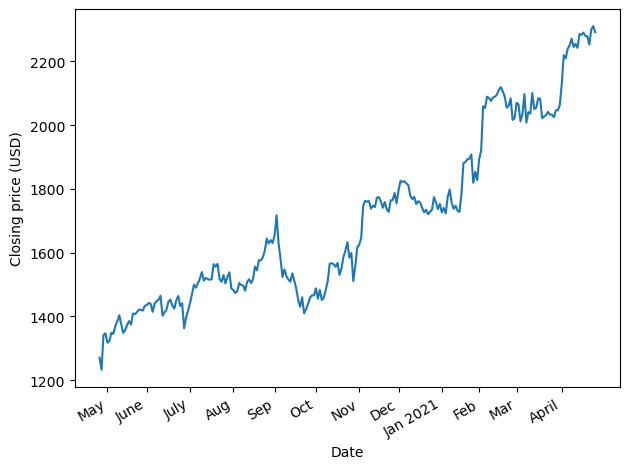

In [82]:
fig, ax = plt.subplots()

ax.plot(df['Date'], df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')

plt.xticks(
    [4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235], 
    ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2021', 'Feb', 'Mar', 'April'])

fig.autofmt_xdate()
plt.tight_layout()
plt.show()
#plt.savefig('figures/CH03_F01_peixeiro.png', dpi=300)

You can clearly see a long-term trend, since the closing price increased
between April 27, 2020, and April 27, 2021. However, there are also abrupt changes in
the trend, with periods where it sharply decreases before suddenly increasing again

### 3.1 The random walk process


### 3.2.5 Is GOOGL a random walk?


In [83]:
GOOGL_ADF_result = adfuller(df['Close'])

print(f'ADF Statistic: {GOOGL_ADF_result[0]}')
print(f'p-value: {GOOGL_ADF_result[1]}')

ADF Statistic: 0.16025048664771302
p-value: 0.9699419435913057


In [84]:
diff_close = np.diff(df['Close'], n=1)

In [85]:
GOOGL_diff_ADF_result = adfuller(diff_close)

print(f'ADF Statistic: {GOOGL_diff_ADF_result[0]}')
print(f'p-value: {GOOGL_diff_ADF_result[1]}')

ADF Statistic: -5.303439704295234
p-value: 5.3865309614545585e-06


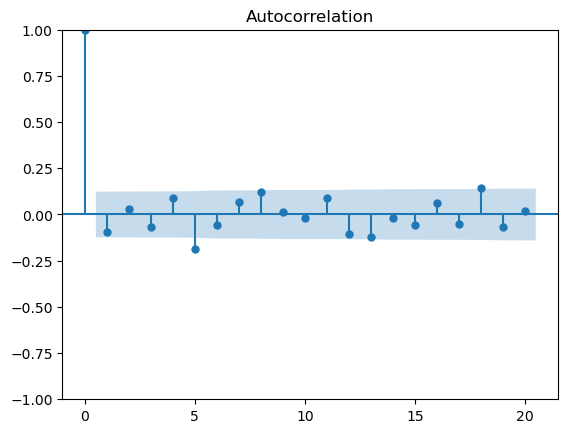

In [86]:
plot_acf(diff_close, lags=20);
plt.show()
#plt.savefig('figures/CH03_F13_peixeiro.png', dpi=300)

## 3.3 Forecasting a random walk
### 3.3.1 Forecasting on a long horizon

In [87]:
df = pd.DataFrame({'value': random_walk})

train = df[:800]
test = df[800:]

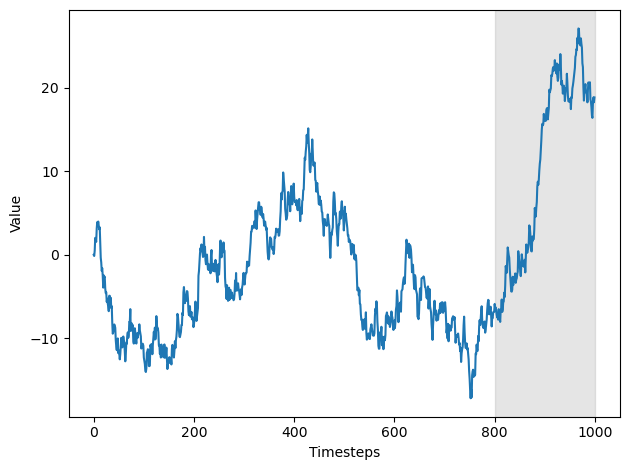

In [88]:
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.axvspan(800, 1000, color='#808080', alpha=0.2)

plt.tight_layout()
plt.show()

#plt.savefig('figures/CH03_F14_peixeiro.png', dpi=300)

In [89]:
mean = np.mean(train.value)

test.loc[:, 'pred_mean'] = mean

test.head()

,value,pred_mean
800,-5.876664,-3.677206
801,-6.392708,-3.677206
802,-6.296588,-3.677206
803,-6.758863,-3.677206
804,-7.193359,-3.677206


In [90]:
last_value = train.iloc[-1].value

test.loc[:, 'pred_last'] = last_value

test.head()

,value,pred_mean,pred_last
800,-5.876664,-3.677206,-6.814947
801,-6.392708,-3.677206,-6.814947
802,-6.296588,-3.677206,-6.814947
803,-6.758863,-3.677206,-6.814947
804,-7.193359,-3.677206,-6.814947


In [91]:
deltaX = 800 - 1
deltaY = last_value - 0

drift = deltaY / deltaX

x_vals = np.arange(801, 1001, 1)

pred_drift = drift * x_vals

test.loc[:, 'pred_drift'] = pred_drift

test.head()

,value,pred_mean,pred_last,pred_drift
800,-5.876664,-3.677206,-6.814947,-6.832006
801,-6.392708,-3.677206,-6.814947,-6.840536
802,-6.296588,-3.677206,-6.814947,-6.849065
803,-6.758863,-3.677206,-6.814947,-6.857594
804,-7.193359,-3.677206,-6.814947,-6.866124


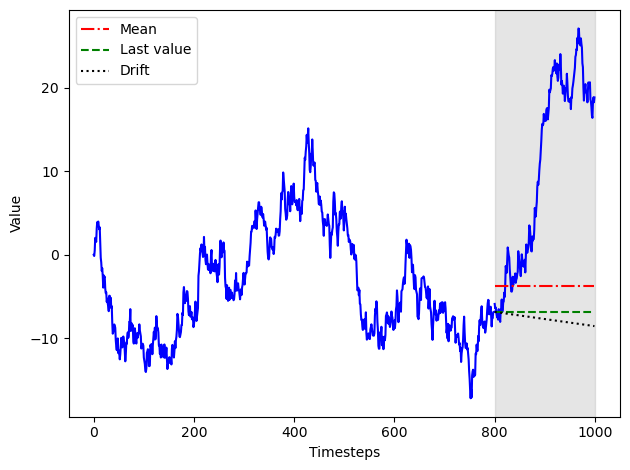

In [92]:
fig, ax = plt.subplots()

ax.plot(train.value, 'b-')
ax.plot(test['value'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')
ax.plot(test['pred_drift'], 'k:', label='Drift')

ax.axvspan(800, 1000, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
plt.show()
#plt.savefig('figures/CH03_F15_peixeiro.png', dpi=300)

In [93]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(test['value'], test['pred_mean'])
mse_last = mean_squared_error(test['value'], test['pred_last'])
mse_drift = mean_squared_error(test['value'], test['pred_drift'])

print(mse_mean, mse_last, mse_drift)

326.50277395297474 425.1726033055617 466.2172769077409


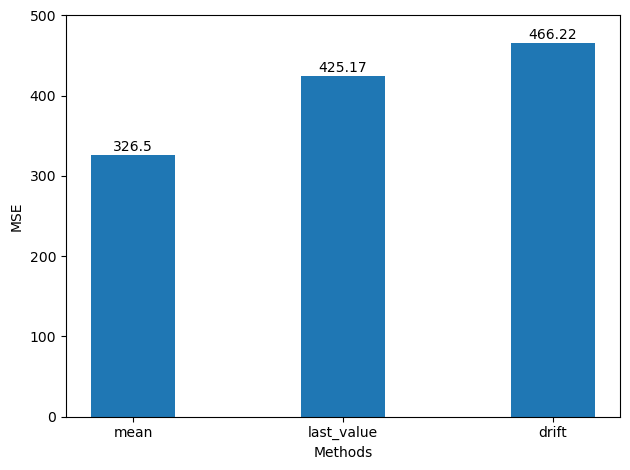

In [94]:

fig, ax = plt.subplots()

x = ['mean', 'last_value', 'drift']
y = [mse_mean, mse_last, mse_drift]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_ylim(0, 500)

for index, value in enumerate(y):
    plt.text(x=index, y=value+5, s=str(round(value, 2)), ha='center')

plt.tight_layout()
plt.show()

#plt.savefig('figures/CH03_F16_peixeiro.png', dpi=300)

### 3.3.2 Forecasting the next timestep


In [95]:
df_shift = df.shift(periods=1)

df_shift.head()

,value
0,NaN
1,0.000000
2,-0.138264
3,0.509424
4,2.032454


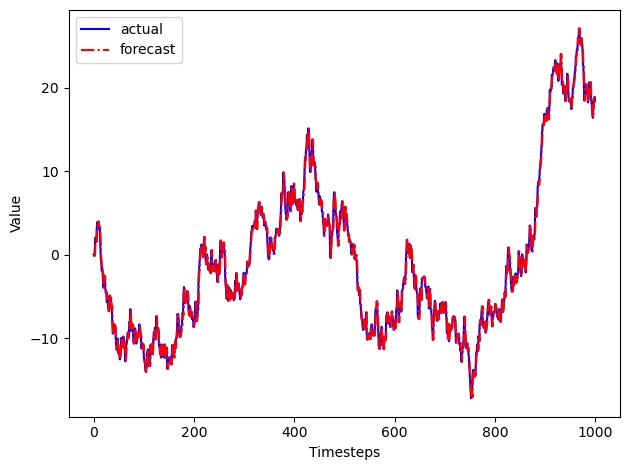

In [96]:
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

#plt.savefig('figures/CH03_F18_peixeiro.png', dpi=300)

In [97]:
mse_one_step = mean_squared_error(test['value'], df_shift[800:])

mse_one_step

0.9256876651440581

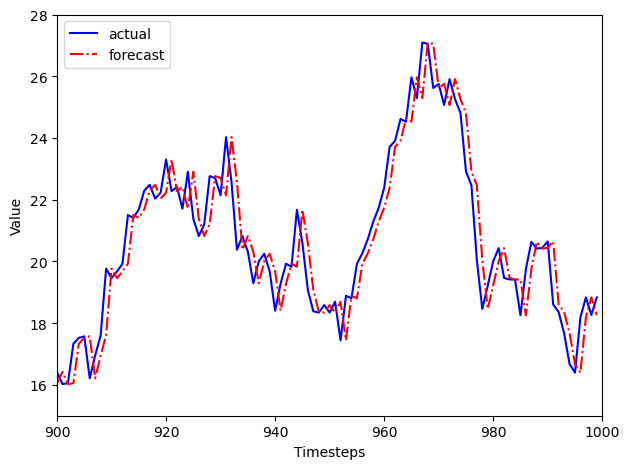

In [98]:
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc=2)

ax.set_xlim(900, 1000)
ax.set_ylim(15, 28)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
plt.show()
#plt.savefig('figures/CH03_F19_peixeiro.png', dpi=300)